<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [2]:
import tensorflow as tf
import tensorflow.keras as k
from keras.datasets import boston_housing
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [3]:
SEED = np.random.seed(42)

In [4]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

X_train = k.utils.normalize(X_train)
X_test = k.utils.normalize(X_test)

57344/57026 [==============================] - 0s 1us/step


In [5]:
y_train[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

In [6]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.002412,0.000000,0.015930,0.000000,0.001053,0.012020,0.179454,0.007783,0.007828,0.600788,0.041096,0.776719,0.036634
1,0.000041,0.154587,0.003804,0.000000,0.000778,0.014260,0.029418,0.011749,0.003748,0.652077,0.027545,0.740857,0.005827
2,0.006345,0.000000,0.023446,0.000000,0.000817,0.006438,0.129538,0.001726,0.031089,0.862723,0.026167,0.486441,0.004223
3,0.000087,0.000000,0.011339,0.000000,0.001125,0.013190,0.075376,0.013077,0.010924,0.489400,0.044133,0.867155,0.017500
4,0.004743,0.000000,0.023248,0.000000,0.000916,0.008189,0.113541,0.003297,0.030826,0.855411,0.025945,0.502753,0.018816
5,0.000578,0.000000,0.015017,0.000000,0.001003,0.011614,0.151183,0.009606,0.010174,0.583979,0.039882,0.795860,0.023888
6,0.011733,0.000000,0.023117,0.000000,0.000894,0.007070,0.127716,0.002018,0.030652,0.850586,0.025799,0.506903,0.030141
7,0.007119,0.000000,0.034017,0.000000,0.001513,0.009500,0.173733,0.002453,0.008687,0.700144,0.025539,0.689546,0.045900
8,0.004795,0.000000,0.043565,0.000000,0.001938,0.012522,0.222496,0.003374,0.011125,0.896658,0.032707,0.376619,0.037046
9,0.002712,0.000000,0.036450,0.000000,0.001039,0.008357,0.166515,0.002397,0.006661,0.727669,0.035301,0.660897,0.057298


In [8]:
#Baseline
housing_model = k.Sequential()

In [9]:
# Input => Hidden
housing_model.add(k.layers.Dense(12, input_dim=13, activation='relu'))
# Output
housing_model.add(k.layers.Dense(1))

#Compile
housing_model.compile(loss='mean_squared_error',
                    optimizer='adam',
                    metrics=['mse'])

housing_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                168       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = housing_model.fit(X_train,y_train, epochs=100, verbose=False)

In [11]:
scores = housing_model.evaluate(X_test, y_test)
print(f'{housing_model.metrics_names[1]}: {scores[1]}')

102/102 [==============================] - 0s 546us/sample - loss: 89.5077 - mse: 89.5077
mse: 89.50767517089844


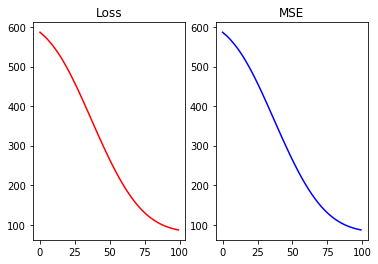

In [13]:
import matplotlib.pyplot as plt

fig, ((ax1,ax2)) = plt.subplots(1,2)
ax1.plot(history.history['loss'], color = 'r')
ax1.set_title("Loss")
ax2.plot(history.history['mse'], color = 'b')
ax2.set_title("MSE");

In [15]:
#2nd Iteration
housing_model = k.Sequential(name='round2')

In [16]:
# Input => Hidden
housing_model.add(k.layers.Dense(12, input_dim=13, activation='linear'))
# Hidden
housing_model.add(k.layers.Dense(2000, activation='relu'))
housing_model.add(k.layers.Dense(2000, activation='linear'))

# Output
housing_model.add(k.layers.Dense(1,activation='linear'))

#Compile
housing_model.compile(loss='mean_squared_error',
                    optimizer='adam',
                    metrics=['mse', 'mae'])

housing_model.summary()

Model: "round2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12)                168       
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              26000     
_________________________________________________________________
dense_4 (Dense)              (None, 2000)              4002000   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2001      
Total params: 4,030,169
Trainable params: 4,030,169
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = housing_model.fit(X_train,y_train, epochs=100, verbose=5)

Train on 404 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100


In [18]:
scores = housing_model.evaluate(X_test, y_test)
print(f'{housing_model.metrics_names[1]}: {scores[1]}')

102/102 [==============================] - 0s 1ms/sample - loss: 35.3468 - mse: 35.3468 - mae: 4.2250
mse: 35.346778869628906


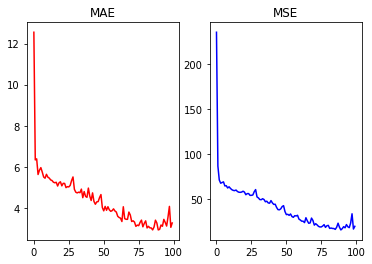

In [20]:
fig, ((ax1,ax2)) = plt.subplots(1,2)
ax1.plot(history.history['mae'], color = 'r')
ax1.set_title("MAE")
ax2.plot(history.history['mse'], color = 'b')
ax2.set_title("MSE");

In [21]:
#Linear Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

lr.fit(X_train, y_train)

preds = lr.predict(X_test)

MSE = mean_squared_error(y_test, preds)
print(f'{MSE:.05f}')

18.16551


In [22]:
#Feature engineering

In [23]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

df = pd.DataFrame(X_train)
df[13] = pd.Series(y_train)
df1 = pd.DataFrame(X_test)
df1[13] = pd.Series(y_test)
df = pd.concat([df, df1])

In [24]:
print(df.shape)
df.head()

(506, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [25]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [26]:
for col in df.columns:
  df[f'{col}_outlier'] = df[col].apply(lambda x: 1 if x > \
                                       np.mean(df[col]) + (np.std(df[col])*2)  # 2 standard deviations away from the mean
                                       else 0)

In [27]:
from sklearn.model_selection import train_test_split as tts

target = 13
omit = [13, '13_outlier']
feats = [col for col in df.columns if col not in omit]

X = df[feats]
y = df[target]

X_train, X_test, y_train, y_test = tts(X,y, test_size=.1 ,random_state=SEED)

In [28]:
X_train = k.utils.normalize(X_train)
X_test = k.utils.normalize(X_test)

In [29]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(f'{((18.16 - mean_squared_error(y_test, y_pred))/18.16)*100:.02f}%\
 improvement')

34.49% improvement


In [30]:
X_train.shape

(455, 26)

In [31]:
housing_model = k.Sequential(name='round3...fight')

# Input => Hidden
housing_model.add(k.layers.Dense(13, input_dim=26, activation='linear'))
# Hidden
housing_model.add(k.layers.Dense(500, activation='relu'))
housing_model.add(k.layers.Dense(500, activation='linear'))

# Output
housing_model.add(k.layers.Dense(1,activation='linear'))

#Compile
housing_model.compile(loss='mean_squared_error',
                    optimizer='adam',
                    metrics=['mse', 'mae'])

housing_model.summary()

Model: "round3...fight"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 13)                351       
_________________________________________________________________
dense_7 (Dense)              (None, 500)               7000      
_________________________________________________________________
dense_8 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 501       
Total params: 258,352
Trainable params: 258,352
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = housing_model.fit(X_train,y_train, epochs=100, verbose=5)

Train on 455 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100


In [33]:
scores = housing_model.evaluate(X_test, y_test)
print(f'{housing_model.metrics_names[1]}: {scores[1]}')

51/51 [==============================] - 0s 1ms/sample - loss: 14.2684 - mse: 14.2684 - mae: 3.0093
mse: 14.26844310760498


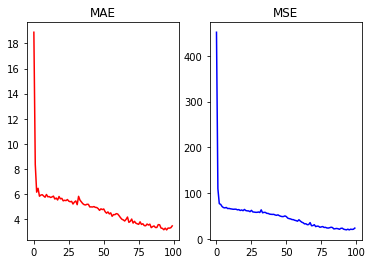

In [34]:
fig, ((ax1,ax2)) = plt.subplots(1,2)
ax1.plot(history.history['mae'], color = 'r')
ax1.set_title("MAE")
ax2.plot(history.history['mse'], color = 'b')
ax2.set_title("MSE");

In [35]:
print(f'{((33.2-17.9)/33.2)*100:.02f}% improvement')

46.08% improvement


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [48]:
from keras.datasets import mnist

In [49]:
# Hyper Parameters
batch_size = 64
num_classes = 10
epochs = 20

In [50]:
# Load the Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [51]:
X_train[0].shape

(28, 28)

In [52]:
X_train.shape

(60000, 28, 28)

In [53]:
# Reshape the data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [54]:
# X Variable Types
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [55]:
y_train[2]

4

In [59]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation, Dense

In [60]:
mnist_model = Sequential()

# Input => Hidden
mnist_model.add(Dense(16, input_dim=784, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
# Output
mnist_model.add(Dense(10,activation='softmax'))

#Compile
mnist_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

mnist_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                170       
Total params: 13,546
Trainable params: 13,546
Non-trainable params: 0
_________________________________________________________________


## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.